# Pair Programming Encoding

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:

- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.

-  Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.

- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

 

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Para evitar que salgan los warnings en jupyter
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("data/df_norm_estand.csv", index_col = 0)
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust
151,48,male,29.700,0,no,southeast,7789.63500,0.209733,0.40,0.070449,-0.5
230,42,female,36.195,1,no,northwest,7443.64305,0.321289,0.76,-0.565461,-0.5
1160,43,female,34.580,1,no,northwest,7727.25320,0.025274,-0.76,-0.964464,0.0
700,21,female,34.870,0,no,southeast,2020.55230,0.701581,0.44,-0.266209,0.0
776,40,male,32.300,2,no,northwest,6986.69700,0.098041,-0.56,-0.677681,1.0


# Decidimos si tienen o no orden

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

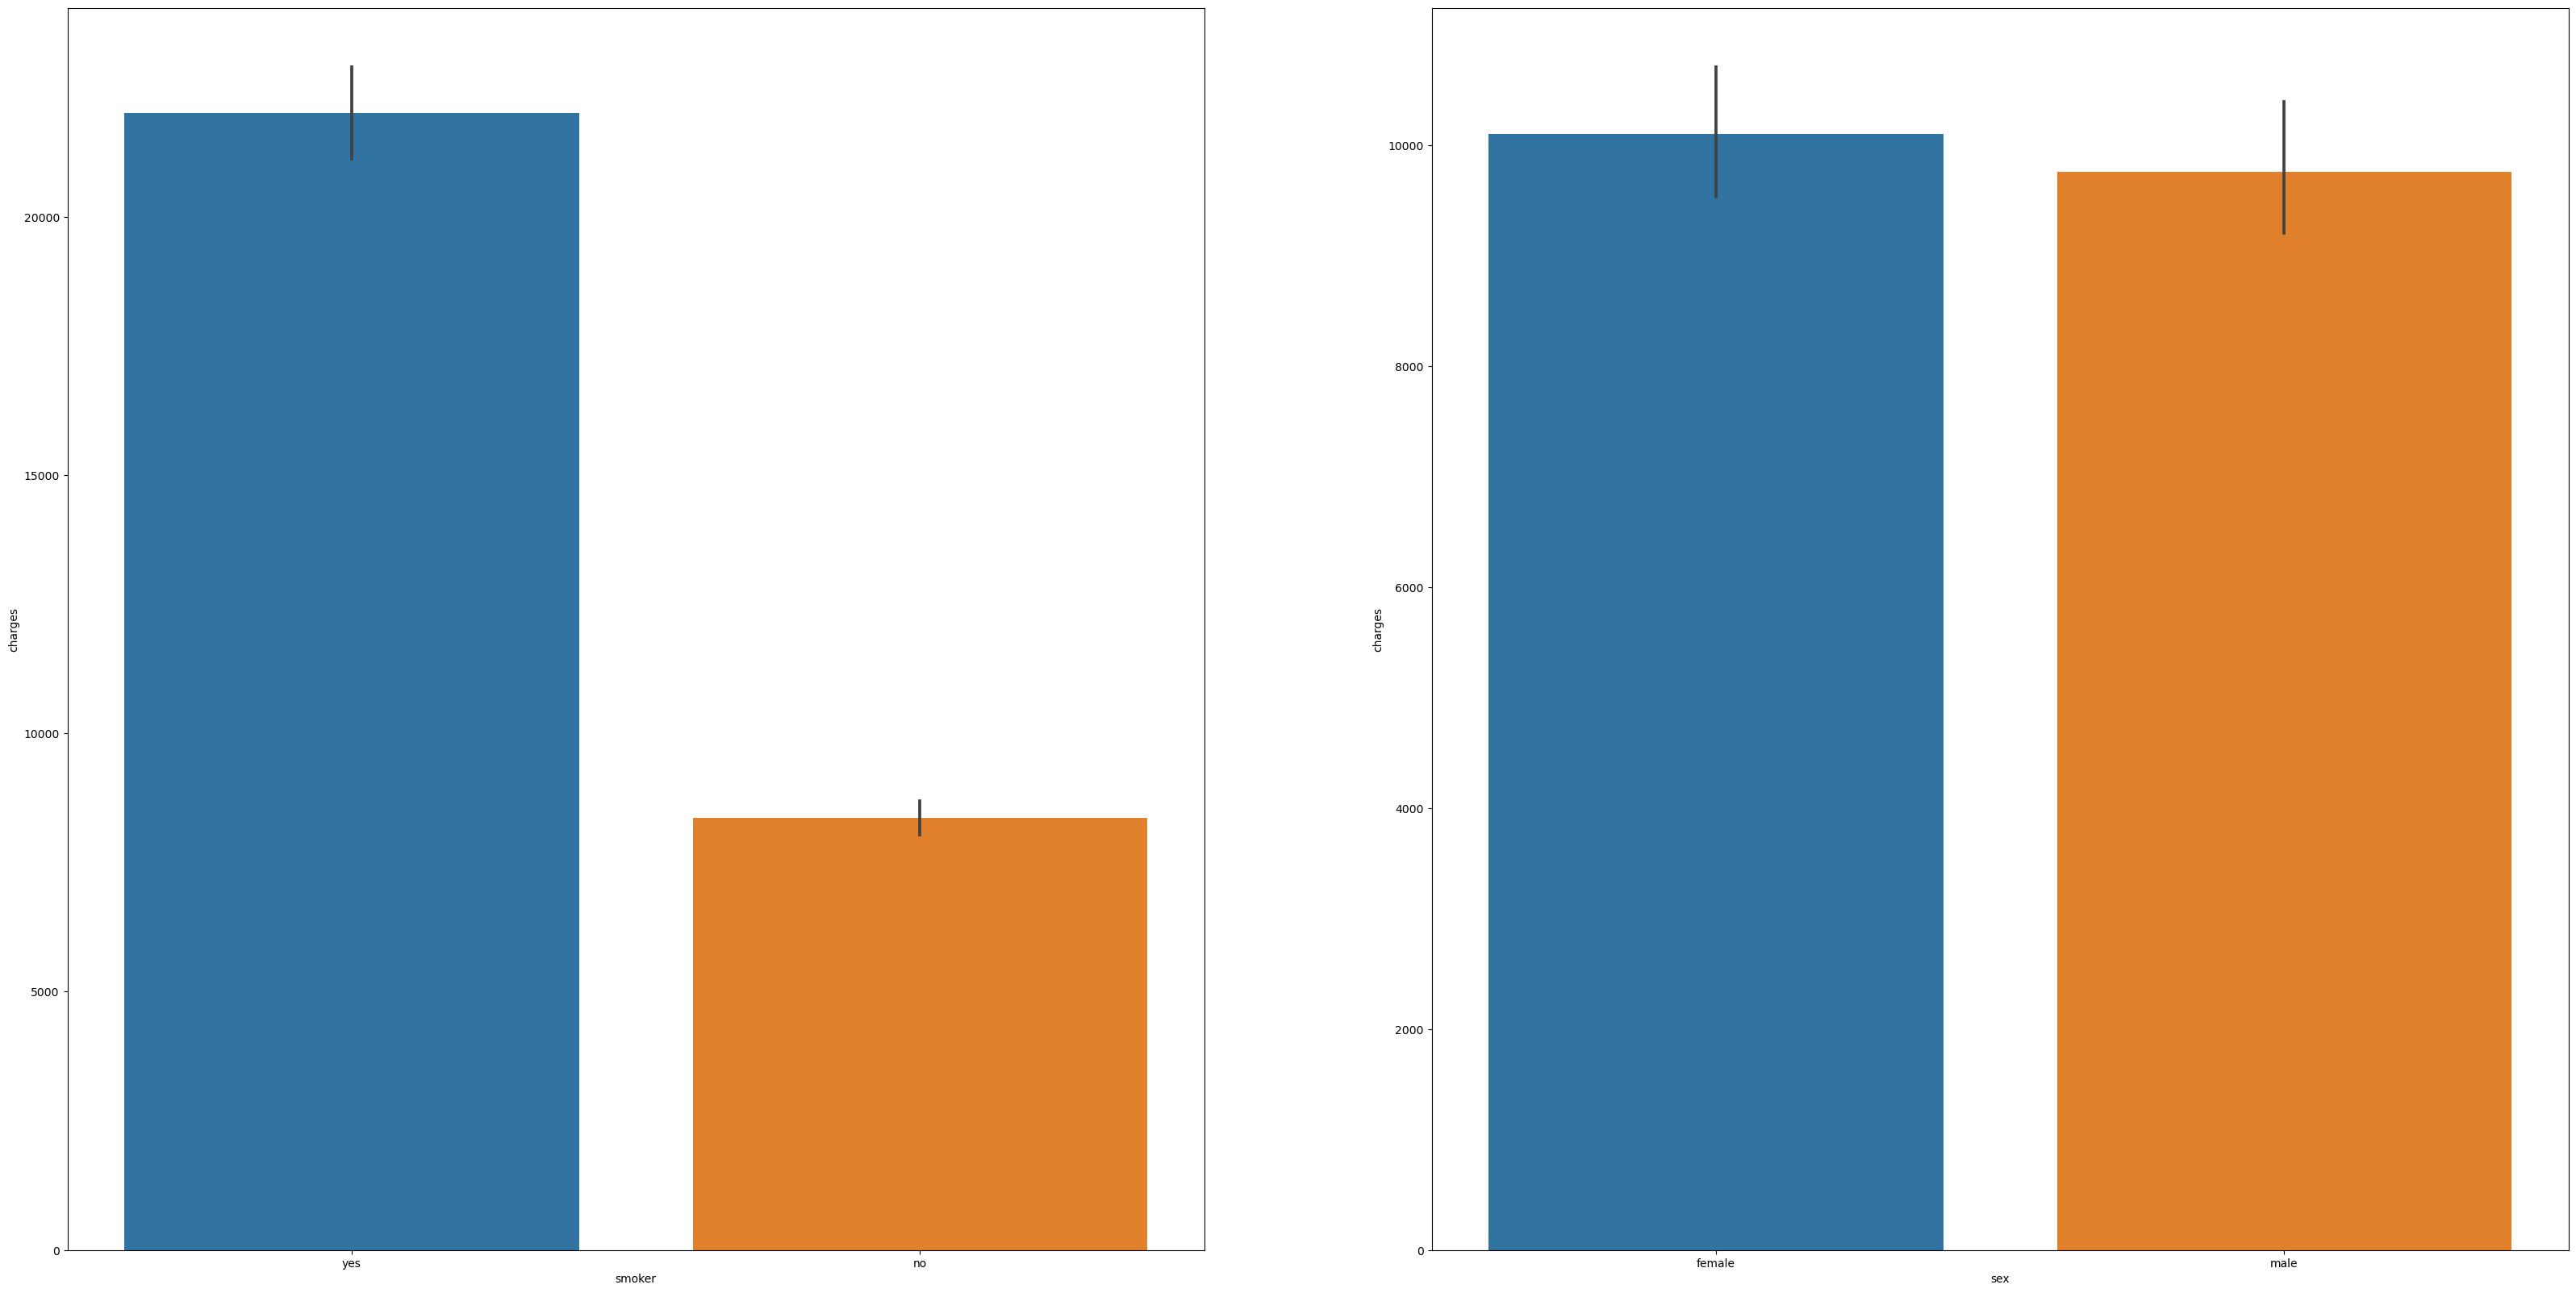

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (40, 20))
sns.barplot (x='smoker', y='charges', data= df, ax= axes[0])
sns.barplot (x='sex', y='charges', data= df, ax= axes[1]);

Concluimos que 'smoker' sí es ordinal viendo la diferencia. 'sex' no, al igual que 'region' como pudimos ver en el pair anterior.

## Columna 'smoker'

In [8]:
ordinal_dict = {'no':0, 'yes': 1}

df['smoker_map'] = df['smoker'].map(ordinal_dict) #Aplicamos un map, tenemos muy pocos valores únicos y nos parece el método más sencillo

In [11]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map
349,19,male,27.835,0,no,northwest,1635.73365,0.221886,0.16,0.581671,1.0,0
191,36,female,26.200,0,no,southwest,4883.86600,0.221827,0.24,0.145262,0.5,0
380,27,female,17.955,2,yes,northeast,15006.57945,0.658484,-0.80,0.419576,-0.5,1


## Columna sex

In [12]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [17]:

dummies = pd.get_dummies(df["sex"], prefix_sep = "_", prefix = "sex", dtype = int)
dummies.head(2)

,sex_female,sex_male
0,1,0
1,0,1


In [18]:

df_dummies = pd.concat([df, dummies], axis = 1)
df_dummies.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map,sex_female,sex_male
0,19,female,27.90,0,yes,southwest,16884.9240,0.472641,-0.80,-0.228803,-0.5,1,1,0
1,18,male,33.77,1,no,southeast,1725.5523,0.018101,-0.84,0.503117,0.0,0,0,1


## Columna region

<AxesSubplot:xlabel='region', ylabel='charges'>

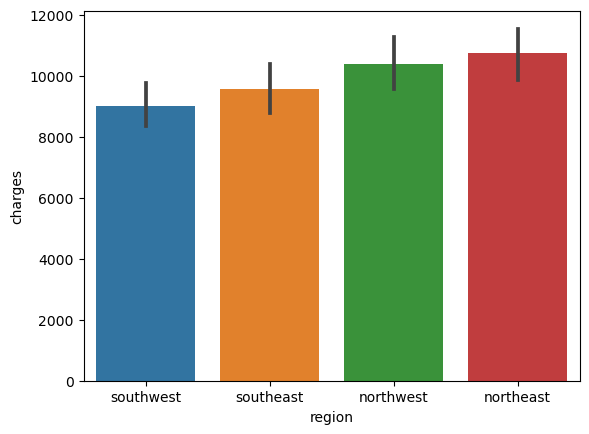

In [15]:

sns.barplot (x='region', y='charges', data= df)


Viendo el barplot que no tiene mucha diferencia  y comprobando también con el summary del pair pasado, concluimos que no es ordinal.

In [20]:
dummies2 = pd.get_dummies(df["region"], prefix_sep = "_", prefix = "region", dtype = int)
dummies2.head(2)

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0


In [21]:
df_dummies2 = pd.concat([df_dummies, dummies2], axis = 1)
df_dummies2.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn,age_robust,bmi_robust,children_robust,smoker_map,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,southwest,16884.9240,0.472641,-0.80,-0.228803,-0.5,1,1,0,0,0,0,1
1,18,male,33.77,1,no,southeast,1725.5523,0.018101,-0.84,0.503117,0.0,0,0,1,0,0,1,0


1 cuando es de esa región, 0 cuando no.

## Guardamos el df

In [22]:
df_dummies2.to_csv('data/df_encoding.csv')